# 12 Dancing Princesses

Open the 12dancingprincesses.txt file. Read the file and use the NLTK library to tokenize each word in the text. 

After using that code to load and tokenizing each word, then remove the punctuation and filler words (stopwords) from the list of tokens. Lastly, get the top 10 words from the text.


In [175]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#this is sample data
from nltk.corpus import names  

from string import punctuation

#### Tokenizing Words and Sentences

Recall in the "Python Dictionaries and String Manipulation" notebook, we used the .split() function to break a sentence apart.

In [176]:
with open ('12dancingprincesses.txt',  encoding='cp1252') as file:
    tknz_wct = word_tokenize(file.read().lower())

tknz_wct[:20]

['the',
 'twelve',
 'dancing',
 'princesses',
 'there',
 'was',
 'a',
 'king',
 'who',
 'had',
 'twelve',
 'beautiful',
 'daughters',
 '.',
 'they',
 'slept',
 'in',
 'twelve',
 'beds',
 'all']

In [177]:
len(tknz_wct)

1849

In [178]:
#the NLTK FreqDist gives a count for how often each part of the text occurs
fd_wct = FreqDist(tknz_wct)
fd_wct

FreqDist({'the': 139, ',': 102, 'and': 78, 'to': 42, '.': 35, ';': 35, 'he': 33, 'they': 32, 'of': 28, '’': 27, ...})

In [179]:
#shows the top 10 words in the text
fd_wct.most_common(10)

[('the', 139),
 (',', 102),
 ('and', 78),
 ('to', 42),
 ('.', 35),
 (';', 35),
 ('he', 33),
 ('they', 32),
 ('of', 28),
 ('’', 27)]

The most common parts of this text seem to be filler words and punctuation. We need to remove them to get a better understand of what the text is about.

In [180]:
#number of tokens in list before puntuation removal
len(tknz_wct)

1849

In [181]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [182]:
#if we want to add the quotation mark at the end of 
#the wc_tex paragraph use the foooowing
new_punct = punctuation + "’" + "‘"
new_punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’‘'

In [183]:
#remove the puntuation tokens from the list
for token in tknz_wct:
    if token in punctuation:
        tknz_wct.remove(token)

In [184]:
#number of tokens in list after puntuation removal
len(tknz_wct)

1663

In [185]:
#list of english stopwords
eng_stopwords = stopwords.words('english')
eng_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [186]:
rm_count = 0
new_words = []  #list to hold new words

for token in tknz_wct:
    if token not in eng_stopwords:
        new_words.append(token)
    else: rm_count += 1

In [187]:
rm_count

944

In [188]:
len(new_words)

719

Now let's see the new top 10 words in this text.

In [189]:
fd_nw = FreqDist(new_words)
fd_nw.most_common(10)

[('’', 27),
 ('‘', 21),
 ('soldier', 19),
 ('princesses', 17),
 ('said', 16),
 ('king', 15),
 ('twelve', 11),
 ('went', 11),
 ('came', 10),
 ('eldest', 10)]

In [190]:
#if we want to add the quotation mark at the end of 
#the wc_tex paragraph use the foooowing
new_punct = punctuation + "’" + "‘"
new_punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’‘'

In [191]:
#remove the puntuation tokens from the list
for token in tknz_wct:
    if token in new_punct:
        tknz_wct.remove(token)

In [192]:
rm_count = 0
new_words = []  #list to hold new words

for token in tknz_wct:
    if token not in eng_stopwords:
        new_words.append(token)
    else: rm_count += 1

In [193]:
#number of tokens in list after puntuation removal
len(tknz_wct)

1618

In [194]:
fd_top10 = FreqDist(new_words)
fd_top10.most_common(10)

[('soldier', 19),
 ('princesses', 17),
 ('said', 16),
 ('king', 15),
 ('twelve', 11),
 ('went', 11),
 ('came', 10),
 ('eldest', 10),
 ('one', 7),
 ('night', 7)]

# Visualizig top ten words by wordcloud() and hist()

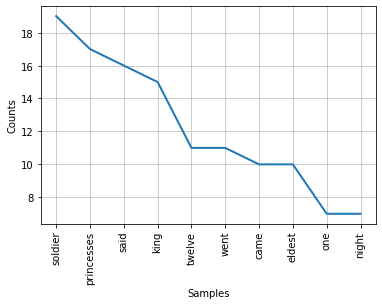

In [195]:
%matplotlib inline
fd_top10.plot(10)

In [204]:
#convert it to df with no column header 
#in case you want column header add , columns = ["Word","Frequency"]
df_fdist=pd.DataFrame(list(fd_top10.items()), columns = ["Word","Frequency"])
#df_fdist.sort_values(by="Frequency", ascending=False)
#df_fdist = df_fdist.reset_index(drop=True)
df_fdist

,Word,Frequency
0,twelve,11
1,dancing,3
2,princesses,17
3,king,15
4,beautiful,1
...,...,...
351,eldest.,1
352,married,1
353,day,1
354,chosen,1


In [222]:
   
df_fdist_wc = pd.DataFrame.from_dict(fd_top10, orient='index')
df_fdist_wc.columns = ['Frequency']
df_fdist_wc.index.name = 'Term'
print(df_fdist_wc.sort_values(by='Frequency',ascending=False).head(10))

            Frequency
Term                 
soldier            19
princesses         17
said               16
king               15
twelve             11
went               11
eldest             10
came               10
one                 7
time                7


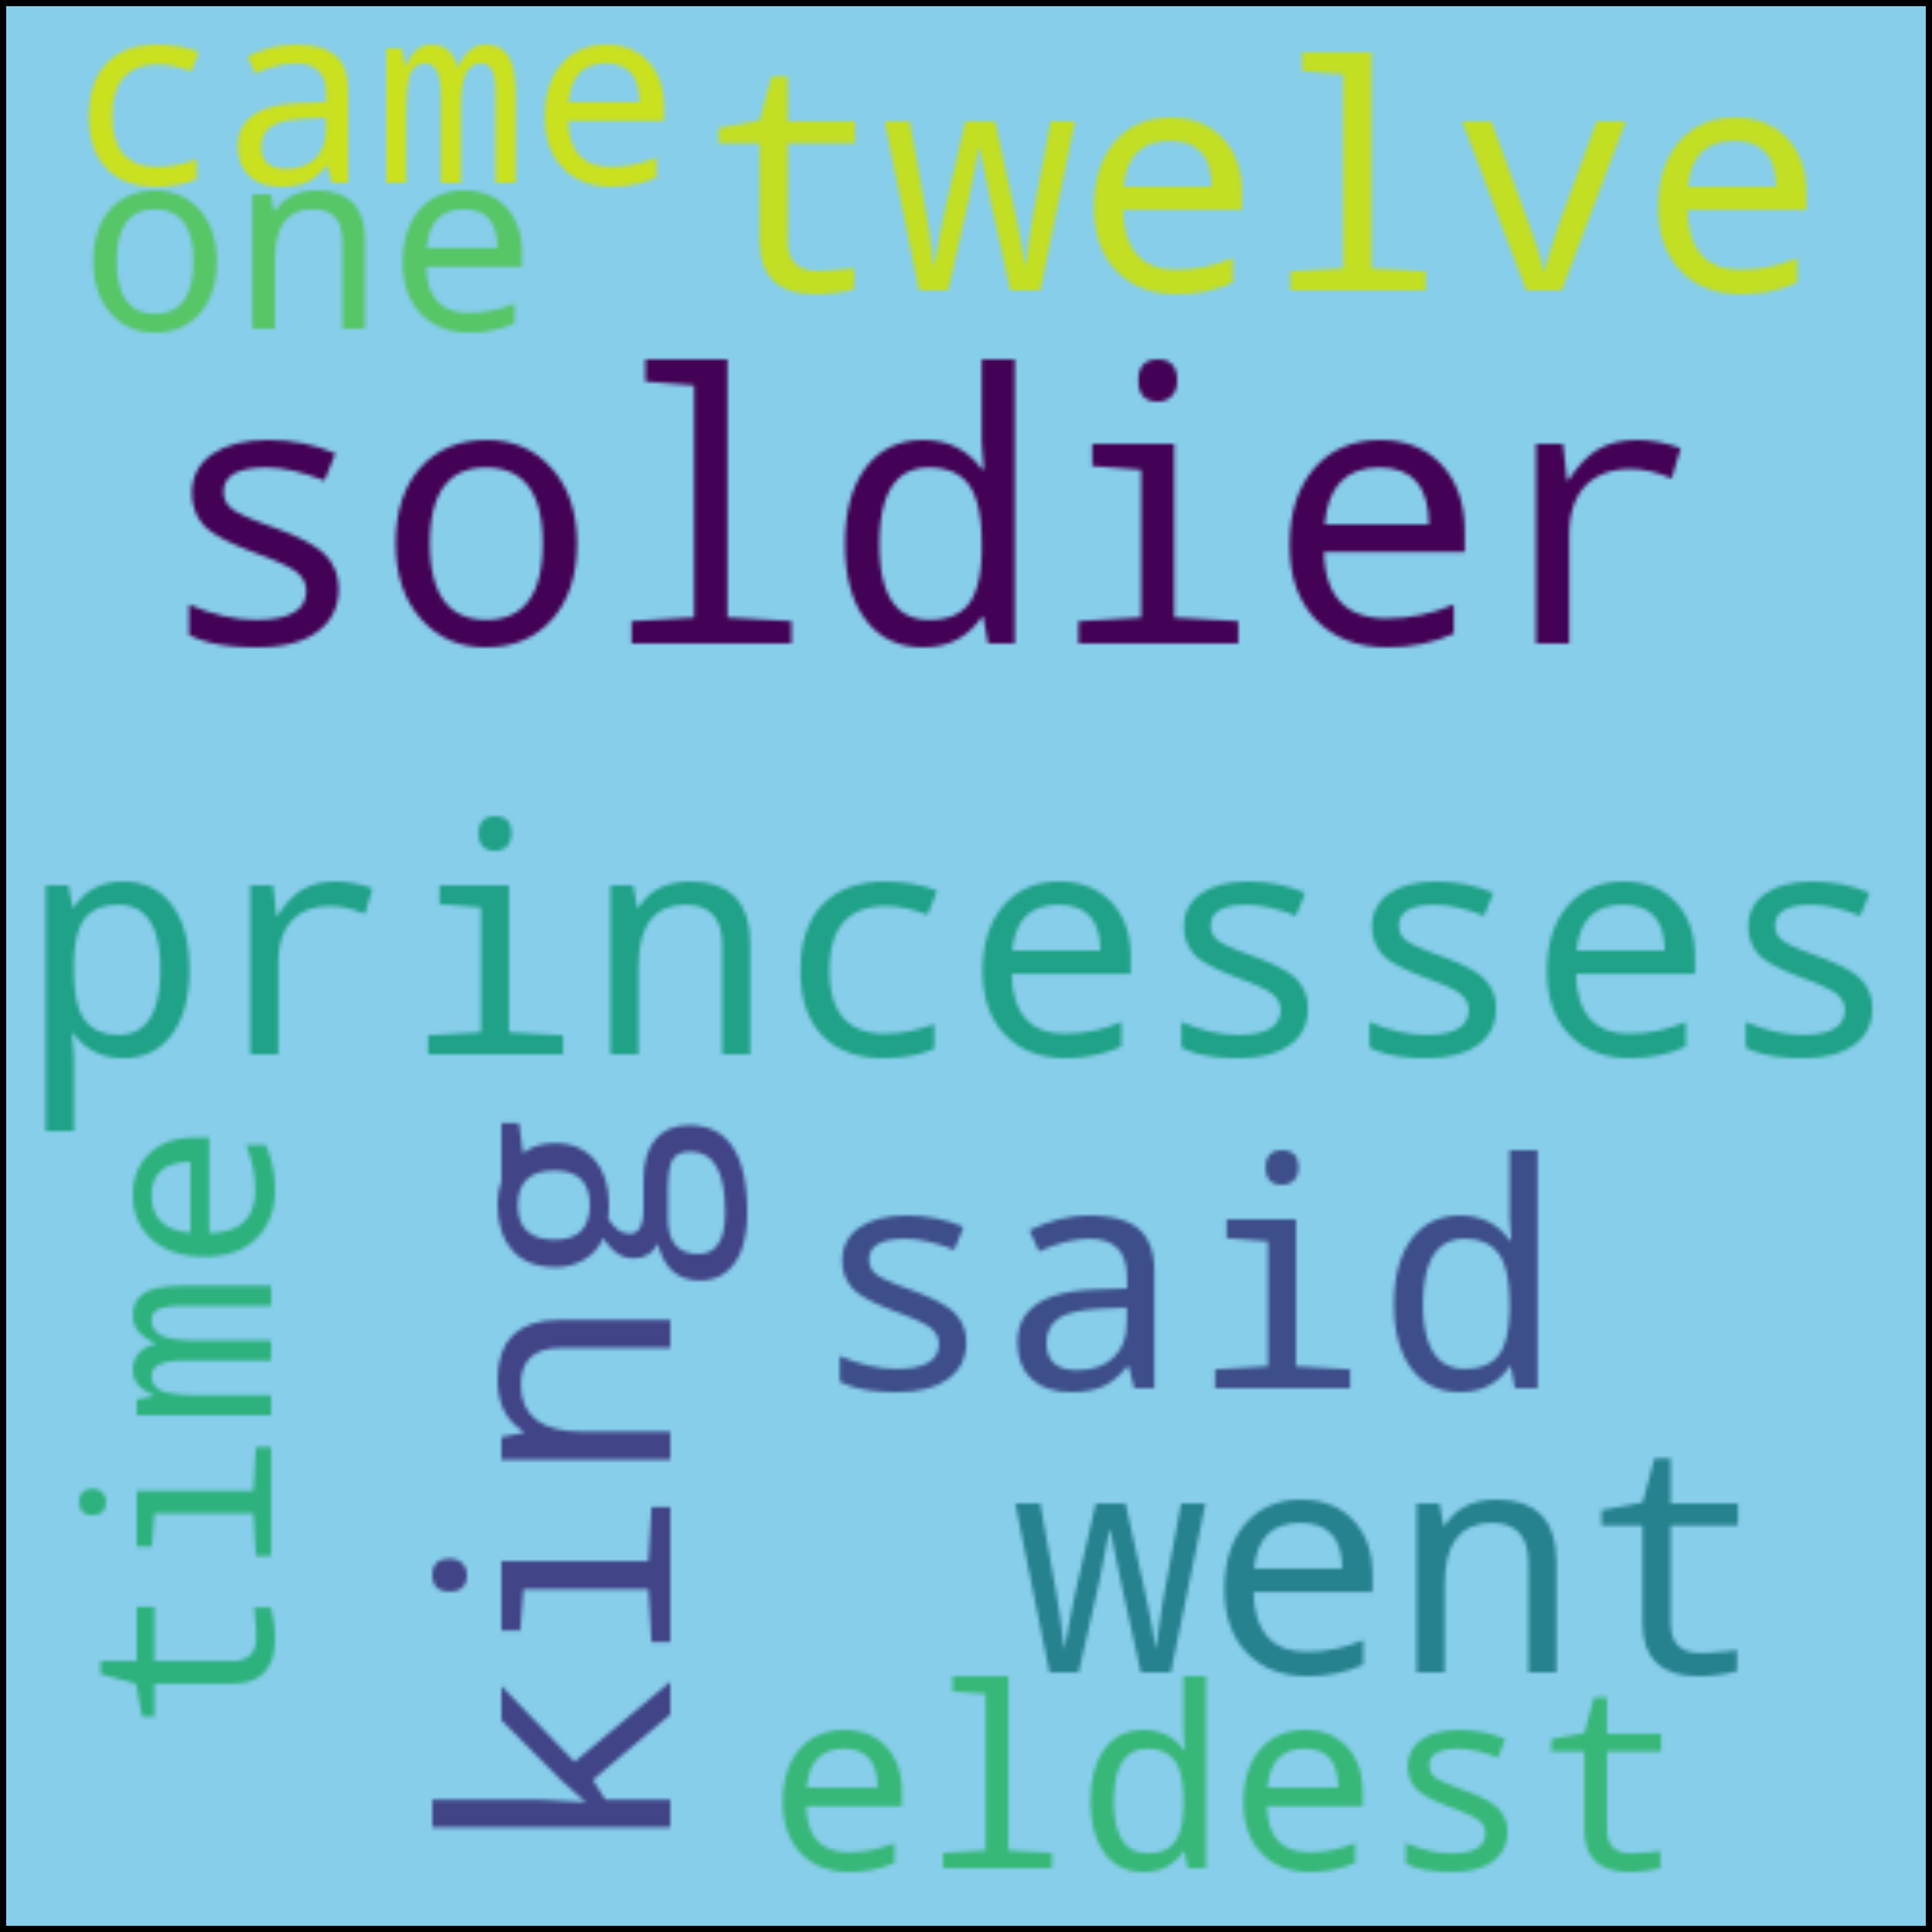

In [226]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df_fdist1.sort_values(by='Frequency',ascending=False).head(10)


wordcloud = WordCloud(
    width = 500,
    height = 500,
    background_color = 'skyblue',
    stopwords =["Term", "Frequency"]).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

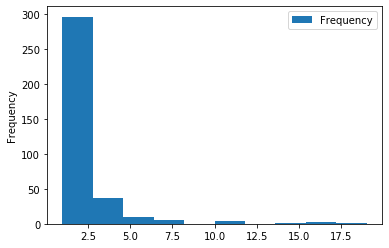

In [199]:
df_fdist.plot(kind='hist')